# Basic optical character using tesseract with python

Tesseract https://en.wikipedia.org/wiki/Tesseract_(software) is a popular free OCR-software https://sourceforge.net/projects/tesseract-ocr/. With a python wrapper it can be used to do OCR in python.

This notebook contains two examples: 
1.) How to do a basic OCR for a badly scanned pdf? For this a PDF of an Article is converted (or imported) as an image and the tesseract package is used for the OCR. 
2.) Read German Fraktur font with Tesseract.

Installation of additional python packages (assuming you have the basic anaconda packages installed):

#### basic OCR: install tesseract and opencv
conda install opencv

conda install tesseract

pip install pytesseract

#### convert pdf to img
pip install pdf2image


# 1. Read badly scanned PDF. 

### First let's have a look at the PDF example

In [1]:
from pdf2image import convert_from_path

In [2]:
# read PDF as image
pages = convert_from_path('Einstein1916_Article_ElementareTheorieDerWasserwell.pdf', 500)

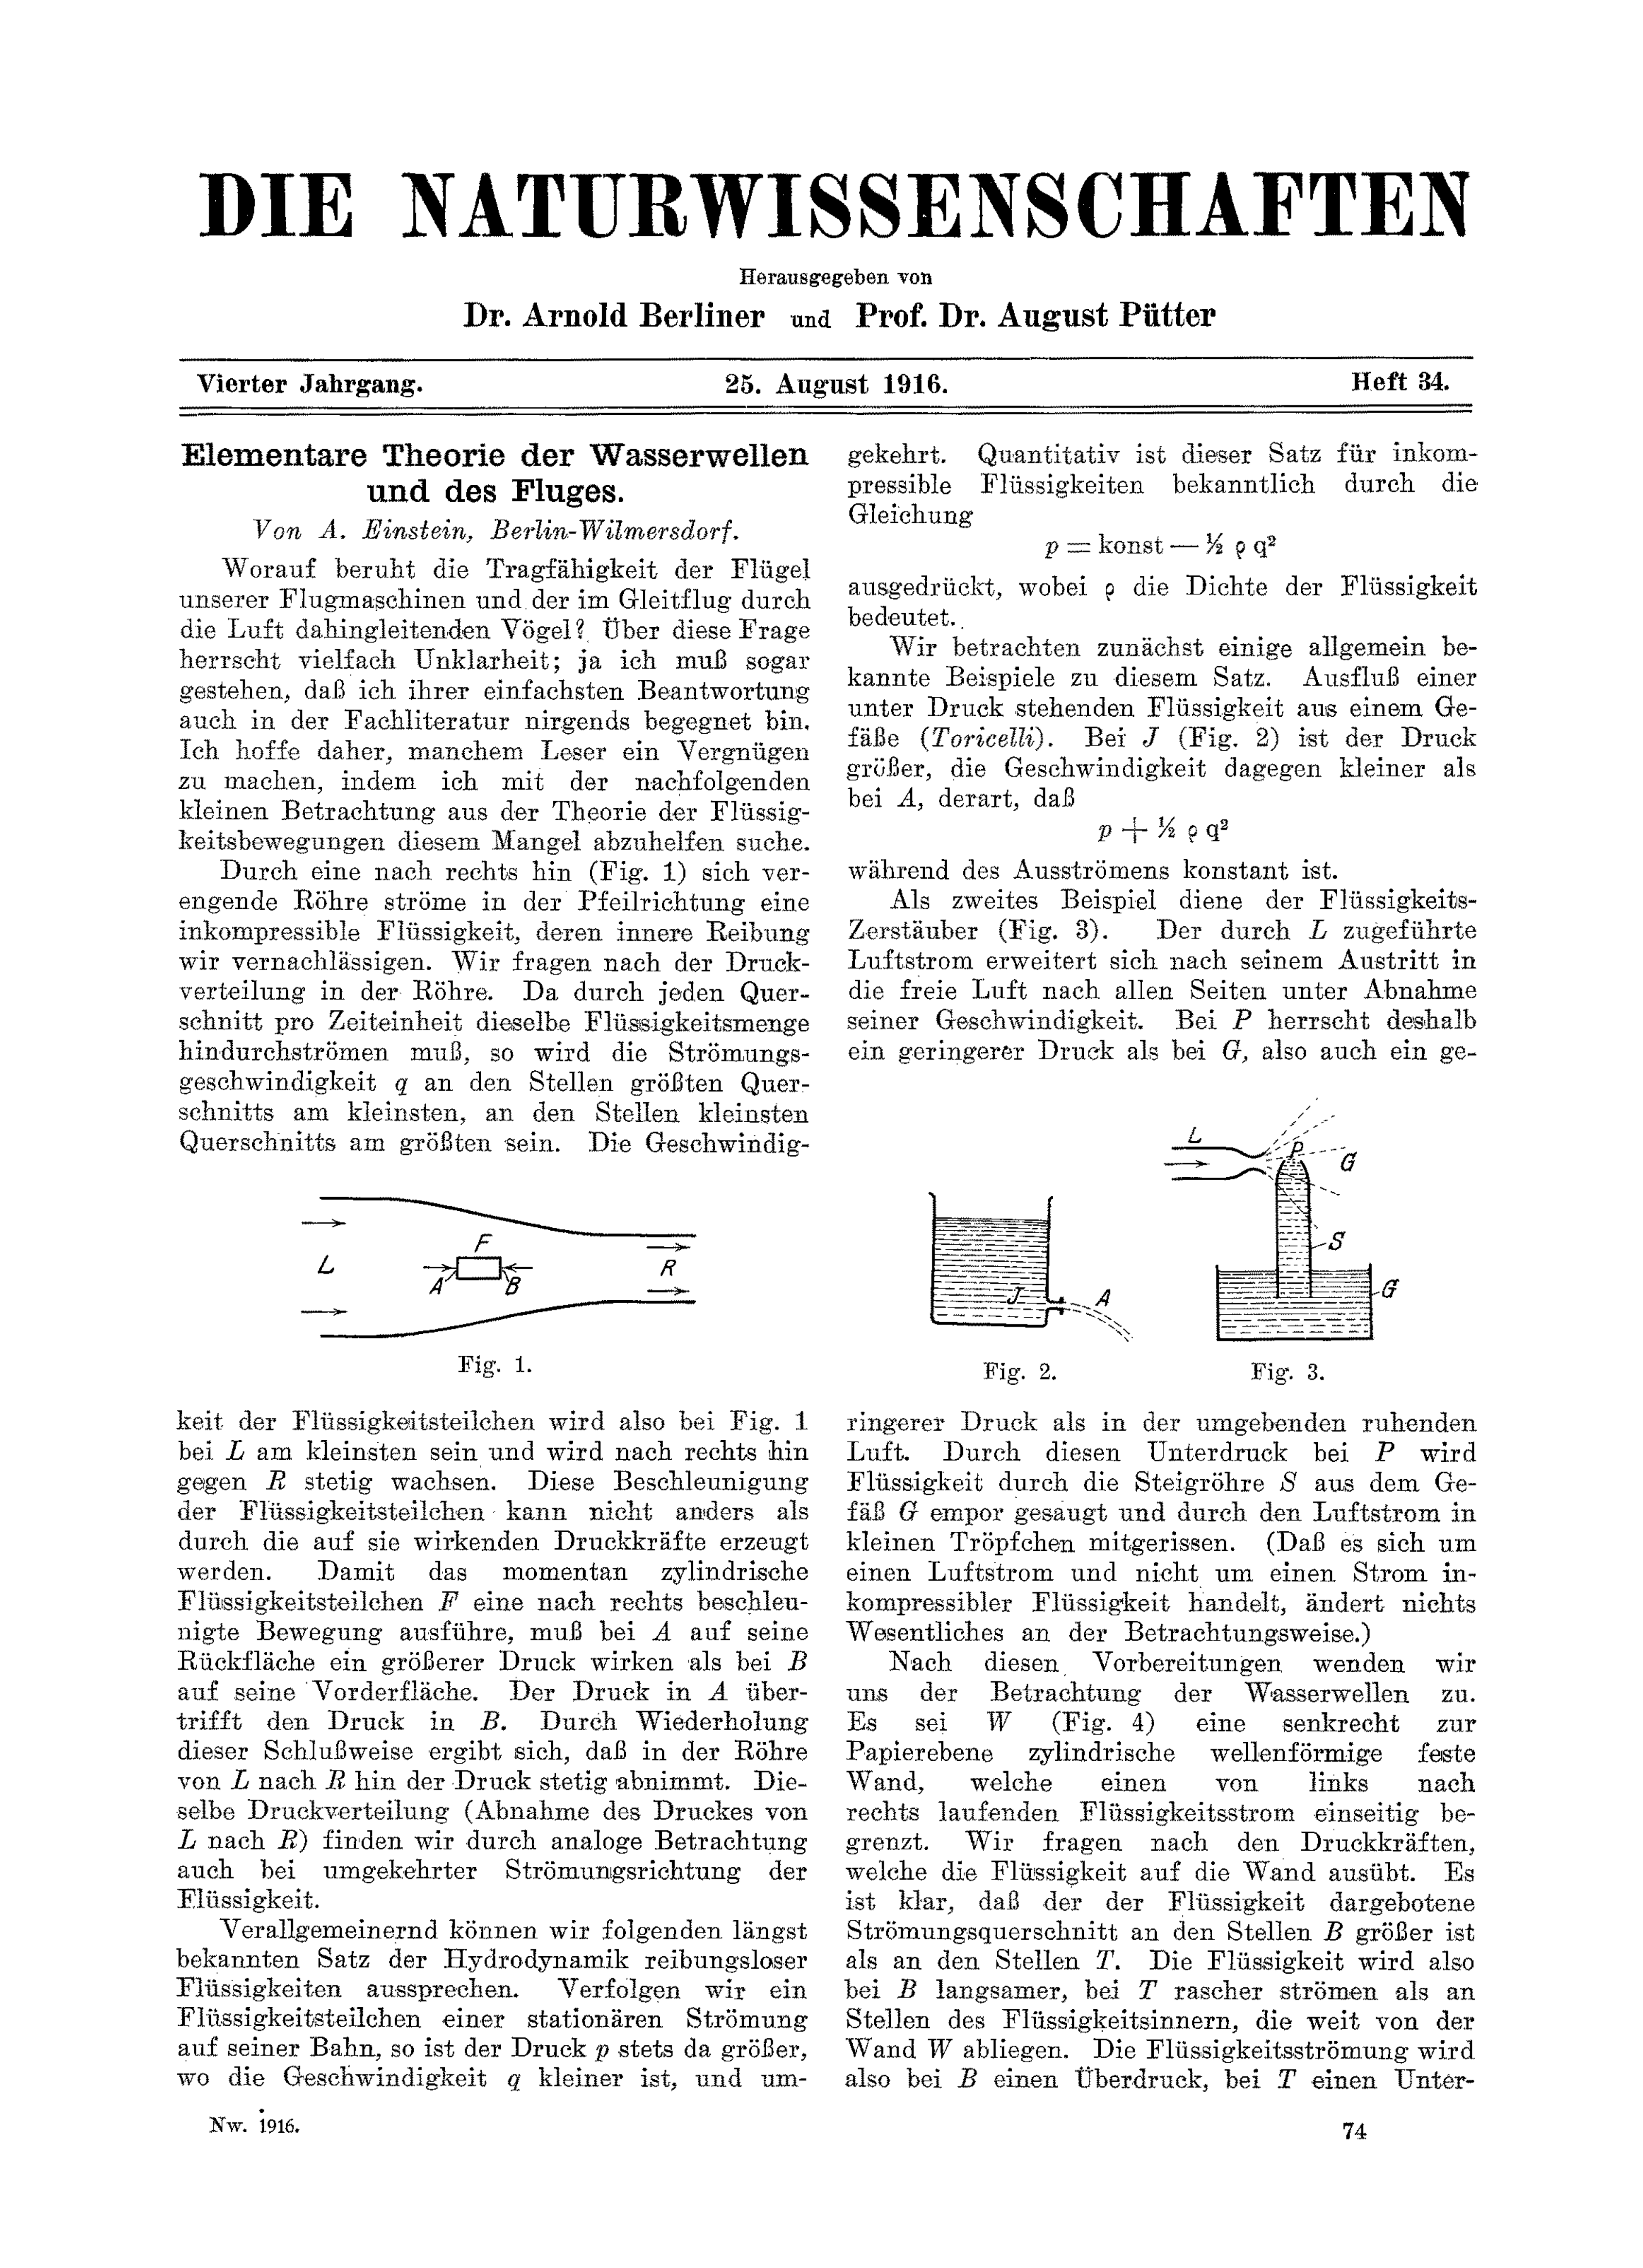

In [3]:
# show first page of pdf as image
pages[0]

## For Comparison: read badly scanned PDF text from scanned file

This part is only to illustrate why we would be interested on optical character recognition for this example. This part can be skipped if you just want to know how to do the OCR. It requires the additional module tika.

In [4]:
# import module for PDF reading
from tika import parser

In [5]:
parsedPDF = parser.from_file('Einstein1916_Article_ElementareTheorieDerWasserwell.pdf')

In [6]:
pdftext = parsedPDF['content']

Now we look at the result. As you can see there are lots of mistakes!!! Please note that this is not an error in the TIKA-module. TIKA just reads whatever is stored as pdftext and does not do any OCR. For good PDF-scans it will work perfectly.

In [7]:
print(pdftext)













































Elementare Theorie der Wasserwellen und des Fluges


DIE NATURWISSENSCHAFTEN 
tterausgegeben yon 

Dr. Arnold Berliner ~na Prof. Dr. August Pti~er 

Vierter Jahrgang. 25. August  1916. Heft 34. 

E l e m e n t a r e  T h e o r i e  d e r  W a s s e r w e l l e n  
u n d  d e s  F l u g e s .  

Van A. Einstein, Ber~n-Witm.ersdorf. 
Worauf beruht die Tragf~higkeit tier Fliige! 

unserer Flugmasehinen und der im Gleitflug dutch 
die Luft dahingleitend.en VSgel ? $3ber diese Frage 
herrseht viel£aeh Unklarheit; ja ieh rang sogar 
gestehen, dab ieh ihrer einfachsten Beantwortung 
aueh in der Faehliteratur nirgends begegnet bin, 
Ich hoffe daher, manchem Leser Bin Vergniigen 
zu machen, indem ieh mit der nachfolgenden 
kleinen Betraehtung aus der Theorie tier Fliissig- 
keitsbewegungen diesem ~angel  abzuhelfen sueh e. 

Dureh eine naeh reehts hin (Fig. l) sieh ver- 
engende RShre strSme in der Pfeilrielhtnng eine 
inkompressible Fliissigkeit, der

# Here the OCR part  starts: 

First import all required packages

In [8]:
# general tools
import os
import numpy as np

In [9]:
# tools for OCR
import cv2
import pytesseract
from PIL import Image
from pytesseract import image_to_string

## Recognize characters from stored image

In this first example we have stored the first page of the pdf as image under "Einstein1916_01.jpg"

In [10]:
# define image name
img_name = "Einstein1916_01.jpg"
# define path where image is stored
src_path = './'

In [11]:
# read image from file
img = cv2.imread(os.path.join(src_path,img_name))

In [12]:
# now we use tesseract for character recognition
extxt = pytesseract.image_to_string(img)

In [13]:
# Print result
print(extxt)

DIE NATURWISSENSCHAFTEN

orausgegeben von
Dr. Arnold Berliner ua Prof. Dr. August Piitter

 

Vierter Jabrgang.

Elementare Theorie der Wasserwellen
und des Fluges.
Von A. Binstein, Berlin-Wilmersdorf.

Worauf beruht dio Tragfihigkeit der Fligel
unserer Flugmaschinen und der im Gleitflue durch
dic Luft dahingleitenden Vogel Uber diese Frage
herrscht vielfach Unklarheit; ja ich muB sogar
gestehen, daB ich ihrer cinfachsten Beantwortung
auch in der Fachliteratur nirgends begegnet bin.
Teh hoffe daher, manchem Leeer ein Vorgntigen
za machen, indem ich mit der nachfolgenden
Kleinen Betrachtung aus der Theorie der Fliissig-
Keitsbewegungen diesem Mangel abzuhelfen suche.

Durch eine nach rechts hin (Fig. 1) sich ver-
engende Rohre strime in der Pfeilrichtung eine
inkompressible Flissigkeit, deren innere Reibung
wir vernechlissigen. Wir fragen nach der Druck-
verteilung in der Réhre. Da durch jeden Quer-
schnitt pro Zeiteinheit dieselbe Flissigkeitsmenge
hindurchstrémen mu3, so wird dic Stri

This is slightly better, but there are still a lot of mistakes. Can we do better?

### Select language for character recognition

One reason for the bad quality is the fact that language-specific characters (German) are not recognized correctly. We can change this by loading the correct language data

In [14]:
# tesseract character recognition with german language data
extxt = pytesseract.image_to_string(img, lang='deu')

In [15]:
# Print result
print(extxt)

DIE NATURWISSENSCHAFTEN

Herausgegeben von
Dr. Arnold Berliner una Prof. Dr. August Pütter

 

Vierter Jahrgang.

Elementare Theorie der Wasserwellen
und des Fluges.
Von A. Einstein, Berlin-Wilmersdorf.

Worauf beruht die Tragfähigkeit der Flügel
unserer Flugmaschinen und der im Gleitflug durch
die Luft dahingleitenden Vögel? Über diese Frage
herrscht vielfach Unklarheit; ja ich muß sogar
gestehen, daß ich ihrer einfachsten Beantwortung
auch in der Fachliteratur nirgends begegnet bin.
Ich hoffe daher, manchem Leser ein Vergnügen
zu machen, indem ich mit der nachfolgenden
kleinen Betrachtung aus der Theorie der Flüssig-
keitsbowegungen diesem Mangel abzuhelfen suche.

‚Durch eine nach rechts hin (Fig. 1) sich ver-
engende Röhre etröme in der Pfeilrichtung eine
inkompressible Flüssigkeit, deren innere Reibung
wir vernachlässigen. Wir fragen nach der Druck-
verteilung in der Röhre. Da durch jeden Quer-
schnitt pro Zeiteinheit dieselbe Flüssigkeitmenge
hindurchströmen muß, so wird die Strö

Much better! This was the main Mistake! There are still some small errors, but the quality is good enough for text mining or stylometry.

## OCR for entire PDF + additional improvements 

Now we read all the pages (in this case just two) from the PDF. The OCR is slightly improved by adding some image conversion steps (this is not so important here, but may be useful in case of bad image quality). In the end we asseble the text from the PDF into one string, like this it could be used for text analyses.

In [16]:
# first we read all the pdf pages (see above)
pages = convert_from_path('Einstein1916_Article_ElementareTheorieDerWasserwell.pdf', 500)

In [17]:
# now we do image conversion and OCR for all pages
textpages = []
for n,page in enumerate(pages):
    open_cv_image = np.array(page)
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    # Convert to gray
    img = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    # OCR
    extxt = pytesseract.image_to_string(img,lang='deu')
    # Store Text
    textpages.append(extxt)

In [18]:
# Assemble document text
text = textpages[0] + textpages[1]

In [19]:
# Print document text
print(text)

DIE NATURWISSENSCHAFTEN

Herausgegeben von

Dr. Arnold Berliner una Prof. Dr. August Pütter

 

Vierter Jahrgang.

Elementare Theorie der Wasserwellen
und des Fluges.
Von A. Einstein, Berlin-Wilmersdorf.

Worauf beruht die Tragfähigkeit der Flügel
unserer Flugmaschinen und der im Gleitflug durch
die Luft dahingleitenden Vögel? Über diese Frage
herrscht vielfach Unklarheit; ja ich muß sogar
gestehen, daß ich ihrer einfachsten Beantwortung
auch ın der Fachliteratur nirgends begegnet bin.
Ich hoffe daher, manchem Leser ein Vergnügen
zu machen, indem ich mit der nachfolgenden
kleinen Betrachtung aus der Theorie der Flüssig-
keitsbewegungen diesem Mangel abzuhelfen suche.

Durch eine nach rechts hin (Fig. 1) sich ver-
engende Röhre ströme in der Pfeilrichtung eine
inkompressible Flüssigkeit, deren innere Reibung
wir vernachlässigen. Wir fragen nach der Druck-
verteilung in der Röhre. Da durch jeden Quer-
schnitt pro Zeiteinheit dieselbe Flüssigkeitsmenge
hindurchströmen muß, so wird die Str

# 2.) Read German Fraktur Font with Tesseract

In [20]:
# define image name
img_name = "Metz-page1.jpg"
# define path where image is stored
src_path = './'

first we look at the file:

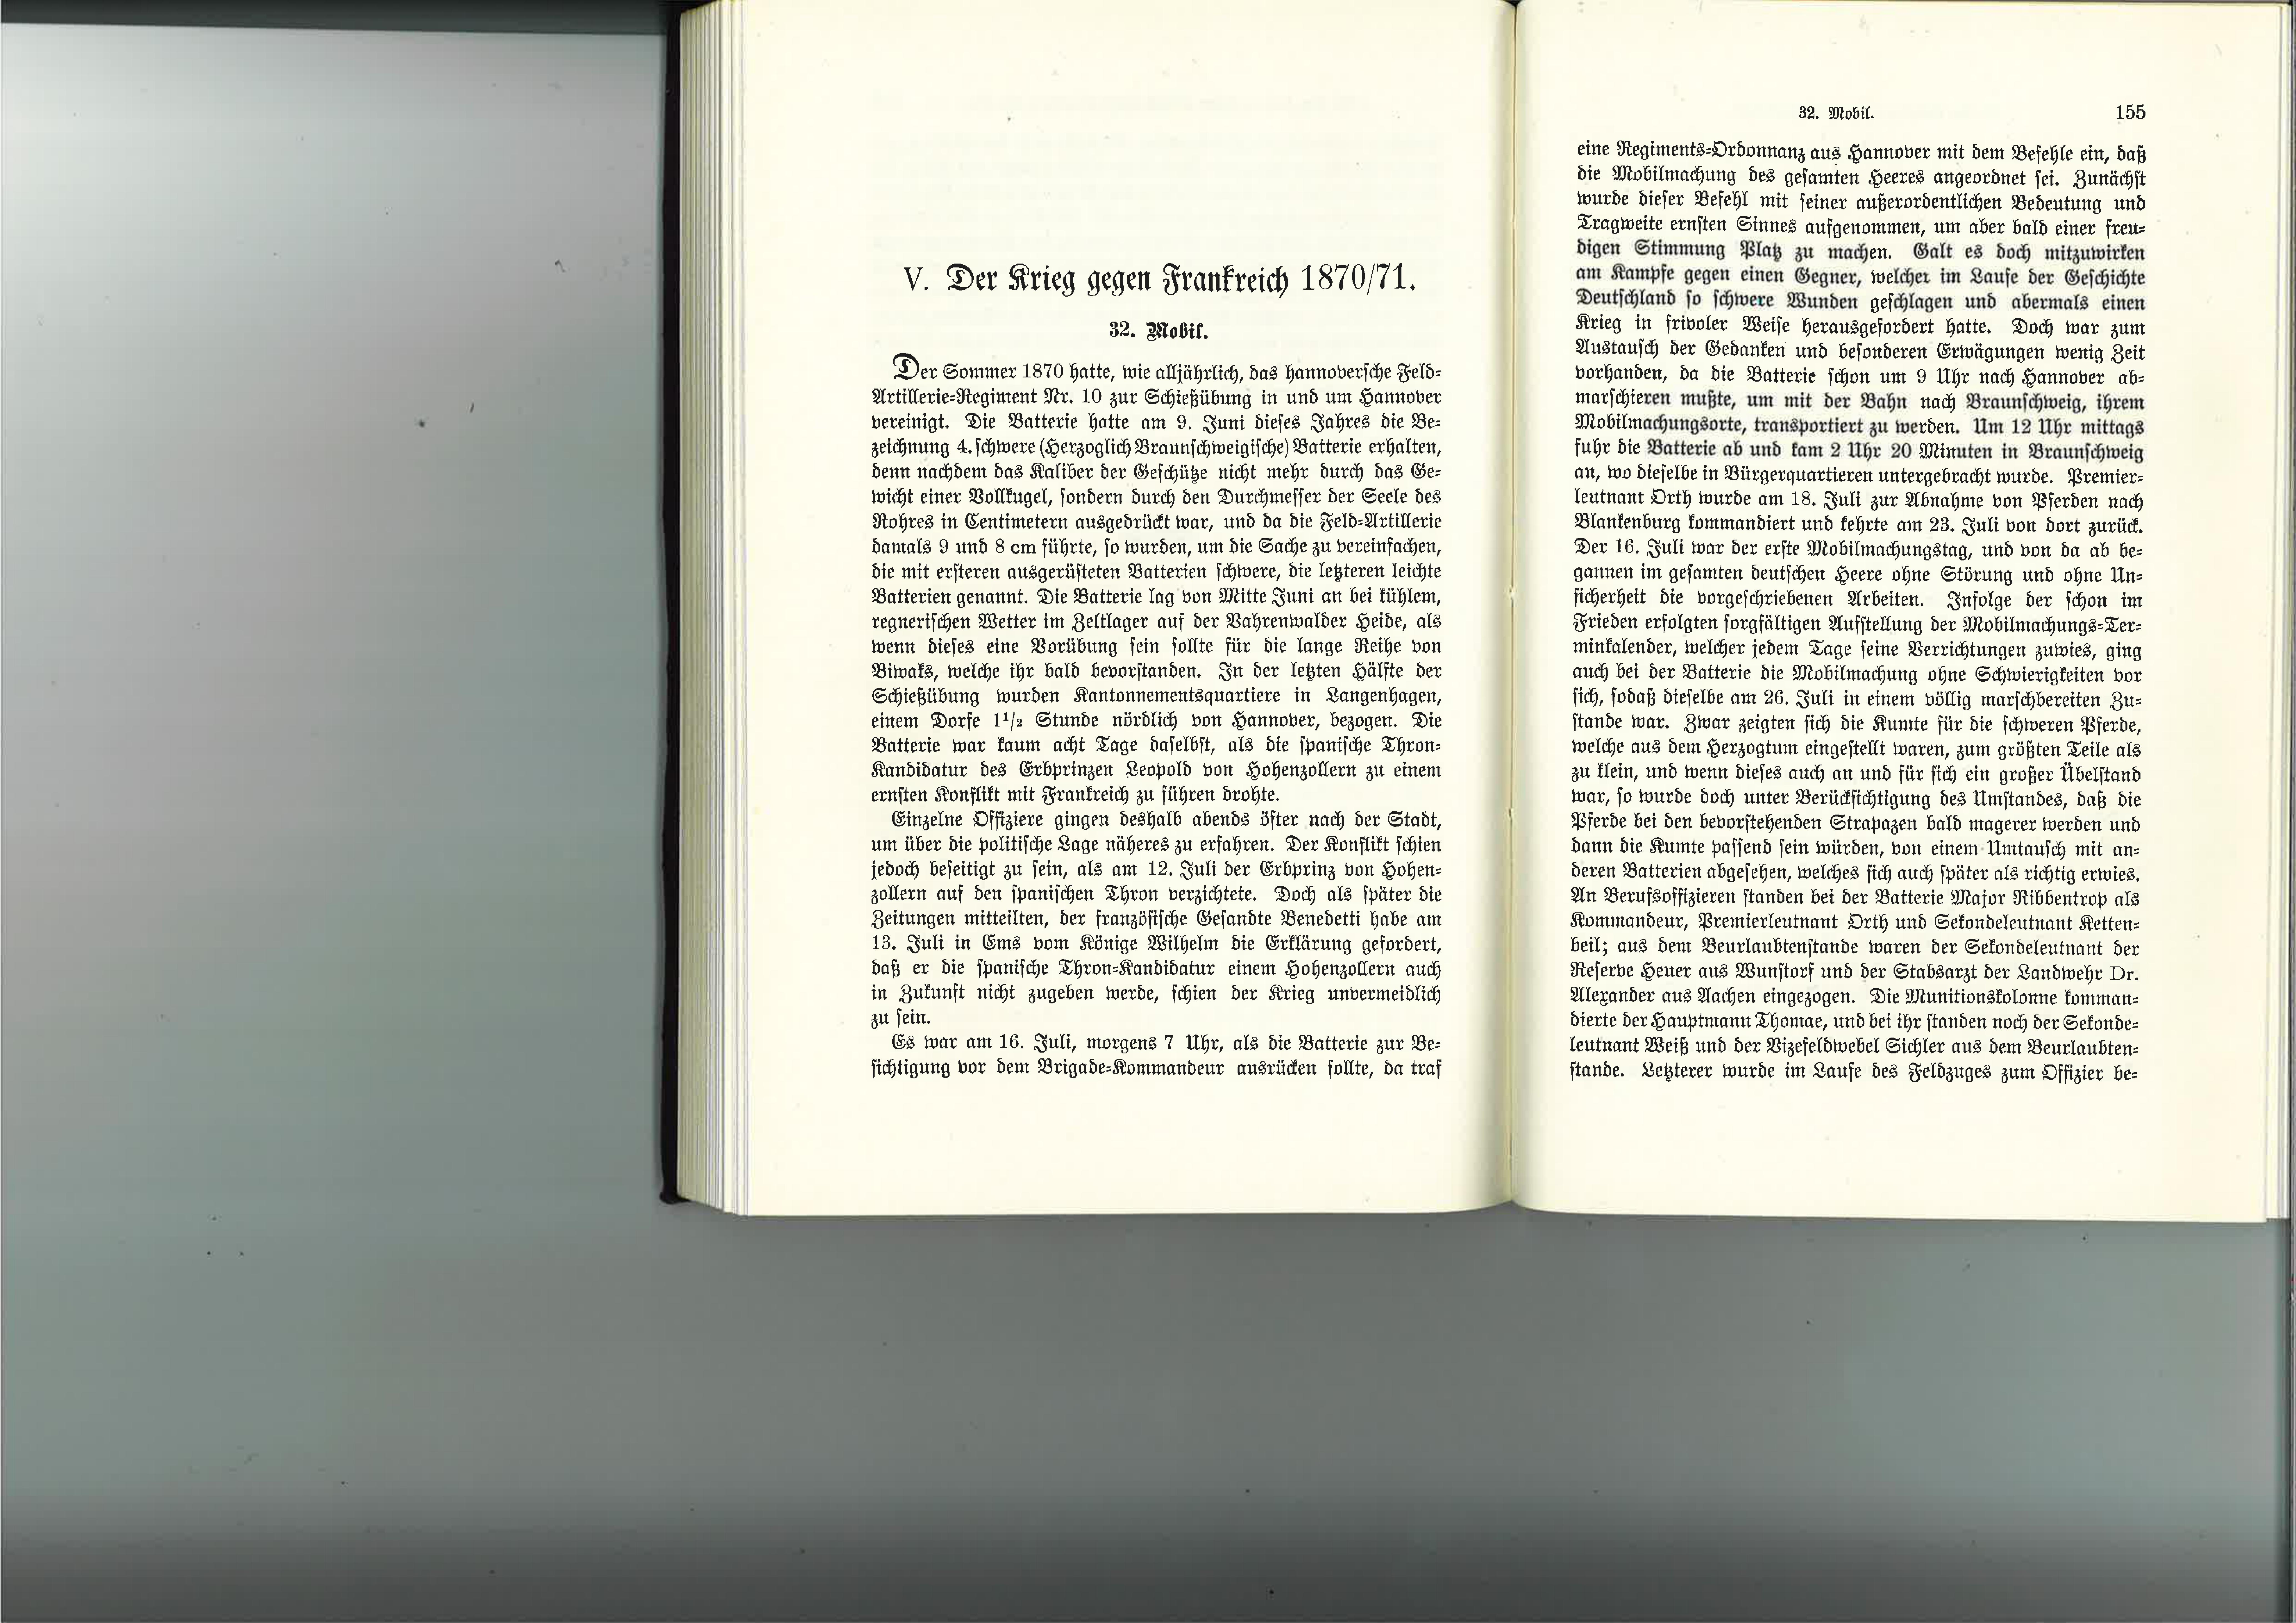

In [21]:
from IPython.display import Image
Image(filename=img_name) 

In [22]:
# now we read the file
img = cv2.imread(os.path.join(src_path,img_name))

### OCR without Fraktur font data

first let's see what happens if we do not provide extra data for the Fraktur font

In [23]:
# now we use tesseract for character recognition
extxt = pytesseract.image_to_string(img, lang='deu')

In [24]:
print(extxt)

V. Der Krieg gegen Franfreich 1870/71.

32. Mobil.

Her Sommer 1870 hatte, wie alljährlich, das hHannoverjche Teld-
Artillerie-Regiment Nr. 10 zur Schießübung in und um Hannover
bereinigt. Die Batterie hatte am 9. Suni diefes Jahres Die Be-
zeichnung 4. fchivere (Herzoglich Braunfchtweigifche) Batterie erhalten,
denn nachdem das Kaliber der Gefchüge nicht mehr durch da3 Ge-
wicht einer Vollfugel, fondern durch den Durchmefjer Der Seele des
Nohres in Sentimetern ausgedrüct war, und da die Feld-Artillerie
damals 9 und 8 cm führte, fo wurden, um die Sache zu vereinfachen,
die mit eriteren ausgerüfteten Batterien fchtivere, die legteren leichte
Batterien genannt. Die Batterie lag von Mitte Sunt an bei fühlen,
regneriichen Wetter im Zeltlager auf der Bahrenmalder Heide, als
wenn Diejes eine VBorübung fein follte für die lange Reihe von
Bimaks, welche ihr bald bevoritanden. Su der lebten Hälfte der
Schtekübung wurden Kantonnementsquartiere in Langenhagen,
einem DBorfe 1!/s Stunde nördlich vo

Actually not that bad! But of course lots of errors...

### OCR with Fraktur font data

For using german Fraktur font you have to copy the corresponding data 'deu_frak.traineddata' from https://github.com/tesseract-ocr/tesseract/wiki/Data-Files#fraktur-data-files into the corresponding share folder of your conda environment, which is ['your conda installation route directory']/envs/['environment name']/share/tessdata/

In [25]:
# tesseract character recognition with german language data
extxt = pytesseract.image_to_string(img, lang='deu_frak')

In [26]:
print(extxt)

V. Der Krieg gegen Frankreich 1870X71.

32. Medic

Der Sommer 1870 hatte, wie alljährlich, das hannoversche Feld-
Artillerie-Regiment Nr. 10 zur Schießübung in und um Hannover
vereinigt. Die Batterie hatte am 9. Juni dieses Jahres die Be-
zeichnung 4. schwere (Herzoglich Braunschweigische) Batterie erhalten,
denn nachdem das Kaliber der Geschütze nicht mehr durch das Ge-
wicht einer Bollkugel, sondern durch den Durchmesser der Seele des
Rohres in Centimetern ausgedrückt war, und da die Feld-Artillerie
damals 9 und 8 cm führte, so wurden, um die Sache zu vereinfachen,
die mit ersteren ausgerüsteten Batterien schwere, die letzteren leichte
Batterien genannt. Die Batterie lag von Mitte Juni an bei kühlem,
regnerischen Wetter im Zeltlager auf der Vahrenwalder Heide, als
wenn dieses eine Vorübung sein sollte für die lange Reihe von
Viwaks, welche ihr bald bevorstanden. Jn der letzten Hälfte der
Schießübung wurden Kantonnementsquartiere in Langenhagen,
einem Dorfe 11s2 Stunde nördlich von Ha

This is much better, but could obviously still be improved. For further improvements we have to look at how to the font-specific data are obtained and see if we can improve the current status by doing our own font-specific training...